# Loading the pre-trained best SVC model from a file

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from tqdm import tqdm

#### Import the joblib library to read from file

In [2]:
from sklearn.externals import joblib

In [3]:
labels_df = pd.read_pickle('labelsDF')
labels_df.head()

,0
0,0
1,0
2,0
3,0
4,0


In [4]:
train_df = pd.read_pickle('trainDF')

# adding the label vector
train_df['Label'] = labels_df[0]

train_df[::1000]

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Label
0,59.07,83.23,44.03,11.94,41.71,82.08,124.24,117.76,102.83,109.92,...,58.16,57.54,50.35,18.03,14.44,15.16,14.97,12.08,12.92,0
1000,15.85,16.08,17.34,19.65,22.82,22.64,22.77,23.04,24.33,26.35,...,44.55,42.38,38.90,26.29,9.31,7.84,8.00,7.92,8.08,0
2000,26.23,29.86,31.60,33.77,37.44,39.17,41.15,43.24,44.20,45.72,...,29.37,34.08,9.15,7.96,14.38,7.91,18.31,13.20,8.51,0
3000,26.36,27.07,28.54,29.99,31.36,30.83,29.25,30.82,32.16,33.06,...,34.56,47.82,63.65,65.32,30.04,7.76,7.91,7.68,8.00,1
4000,46.49,47.14,47.66,47.84,47.78,47.83,48.78,48.09,48.32,48.77,...,30.32,23.90,45.97,64.74,39.94,50.75,43.05,36.04,43.55,1
5000,25.00,25.04,25.04,25.00,24.94,25.02,25.52,25.98,25.44,26.48,...,9.90,13.20,22.45,31.97,24.61,25.31,23.92,20.32,19.59,2
6000,40.00,42.28,45.44,46.53,46.92,47.32,46.12,45.24,46.16,46.80,...,52.11,69.31,77.99,56.52,23.91,14.00,10.75,13.06,10.01,2
7000,59.48,58.86,60.57,62.84,62.23,59.87,56.76,56.00,57.28,58.64,...,67.71,99.27,126.24,124.16,69.98,34.99,20.04,16.64,22.09,2
8000,13.26,13.14,13.56,14.06,14.20,14.60,15.08,15.16,16.00,16.00,...,8.82,11.17,16.79,40.08,33.91,15.11,10.05,9.28,8.82,3
9000,85.78,86.51,89.43,92.46,91.83,88.38,84.97,84.64,85.88,88.45,...,89.93,146.14,197.40,194.76,104.30,47.79,38.47,30.86,27.01,3


##### Note: Reading testDF that has the image name column (create using TestingSetWithNames.ipynb since pickle file is not uploaded to github)

In [5]:
test_df = pd.read_pickle('testDF-with-name')
test_df[::5000]

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,img
0,53.81,53.13,52.06,51.87,52.94,53.65,53.19,52.47,55.18,59.52,...,99.03,118.10,116.58,28.31,10.27,39.25,20.91,11.89,20.12,img_1.jpg
5000,44.23,44.62,44.69,45.68,45.82,46.04,45.88,45.16,46.14,47.41,...,29.93,48.36,70.78,91.49,83.19,35.64,12.90,10.51,9.43,img_13797.jpg
10000,56.32,87.97,54.31,20.23,21.11,51.13,85.44,95.28,86.43,76.03,...,118.65,114.73,73.61,138.57,74.22,49.68,39.97,39.57,68.69,img_19562.jpg
15000,105.20,137.27,168.26,197.32,217.32,228.86,230.91,225.03,214.93,203.02,...,97.39,49.27,44.80,59.82,37.33,74.17,31.63,7.92,63.57,img_25336.jpg
20000,69.94,78.22,104.00,132.44,130.50,109.46,73.62,71.46,66.74,60.04,...,31.23,65.84,27.08,15.57,18.97,11.87,22.54,21.50,13.24,img_31120.jpg
25000,224.72,219.91,214.32,208.63,189.41,165.52,151.29,131.19,111.67,103.07,...,61.69,65.84,85.55,37.21,9.46,7.90,9.86,13.93,77.22,img_36915.jpg
30000,24.98,26.05,28.84,30.91,33.16,35.91,37.48,39.00,40.22,41.38,...,11.25,36.54,9.16,8.04,14.72,13.79,8.44,10.03,9.17,img_42694.jpg
35000,57.19,62.37,88.83,112.23,115.54,109.35,76.11,74.77,71.00,64.93,...,35.26,44.46,25.91,16.44,34.72,37.00,46.85,36.40,81.42,img_48474.jpg
40000,32.87,66.38,38.47,11.58,14.34,38.30,68.54,75.01,74.59,66.24,...,14.44,11.42,13.05,12.49,13.63,13.49,15.27,37.97,37.80,img_5424.jpg
45000,189.93,180.38,172.53,156.98,179.98,195.36,174.94,54.44,30.78,31.78,...,53.15,42.54,24.16,7.92,11.91,31.10,22.00,72.70,16.80,img_59984.jpg


In [6]:
# shuffling using the shuffle() func from sklearn.utils
shuffled_train_df = shuffle(train_df, random_state = 3)
shuffled_train_df = shuffled_train_df.reset_index(drop = True)
shuffled_train_df[::1000]

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Label
0,31.93,31.04,32.34,33.64,33.98,32.92,32.03,32.64,34.17,36.90,...,34.32,54.04,70.90,65.68,27.39,8.26,6.92,7.56,7.32,0
1000,46.00,46.02,46.62,47.12,47.80,47.74,48.00,47.92,49.23,49.48,...,37.30,24.09,68.32,69.20,35.61,13.03,9.94,10.00,46.26,0
2000,51.01,90.91,59.72,19.45,22.98,69.78,126.69,152.91,143.36,136.64,...,17.21,17.51,20.84,18.95,21.23,22.11,24.11,22.90,22.64,1
3000,54.08,85.04,50.65,16.76,19.92,50.23,86.31,89.76,71.88,55.59,...,19.14,20.30,24.44,24.45,26.89,28.88,29.88,29.25,28.22,3
4000,44.08,45.68,46.60,48.44,48.84,48.84,47.28,47.04,48.00,48.27,...,115.65,147.61,129.86,54.46,33.19,20.21,18.04,28.68,22.23,3
5000,42.48,41.54,43.70,44.84,45.15,44.05,43.48,43.00,44.16,44.88,...,49.01,72.50,98.37,92.55,43.90,15.09,10.00,9.98,11.05,9
6000,30.60,31.88,33.46,36.95,39.27,41.66,44.69,46.50,47.95,50.87,...,36.26,44.56,13.59,10.38,21.35,20.55,21.45,50.10,11.93,3
7000,46.59,83.96,54.59,20.32,17.29,47.57,90.23,102.46,81.00,61.14,...,55.74,55.74,51.55,22.44,15.09,16.21,16.21,15.27,16.50,2
8000,90.89,90.67,101.32,122.08,130.22,121.61,107.97,106.46,103.08,89.61,...,47.28,76.01,23.40,14.24,21.65,13.03,21.02,36.02,13.71,9
9000,50.49,92.72,62.07,21.89,23.70,68.80,129.62,142.67,109.53,77.51,...,68.79,69.95,64.90,30.69,17.73,16.79,19.02,19.67,20.58,2


In [7]:
features = [x for x in range(3072)]
X = shuffled_train_df[features]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,31.93,31.04,32.34,33.64,33.98,32.92,32.03,32.64,34.17,36.90,...,26.59,34.32,54.04,70.90,65.68,27.39,8.26,6.92,7.56,7.32
1,42.93,42.86,43.99,44.00,43.55,44.20,44.84,44.26,44.15,44.07,...,55.90,60.69,59.33,51.65,67.99,30.75,54.38,38.94,10.64,28.71
2,47.04,47.39,48.29,48.16,48.16,48.11,48.15,48.16,48.20,48.38,...,71.10,71.72,74.74,83.45,112.36,79.78,93.07,107.43,142.88,134.60
3,28.03,27.51,27.29,28.44,29.08,28.92,29.24,30.14,30.75,31.09,...,21.53,7.92,10.87,40.24,42.31,31.93,35.06,30.81,28.19,24.48
4,14.28,14.44,14.94,15.00,15.12,15.44,16.00,16.16,16.00,16.08,...,34.12,9.69,11.65,16.17,52.87,28.67,12.64,8.72,7.92,8.11


In [8]:
y = shuffled_train_df['Label']
y.head()

0    0
1    7
2    5
3    6
4    1
Name: Label, dtype: int64

In [9]:
X_normalized = scale(X)
print(X_normalized)

[[-0.46540941 -0.64517063 -0.60040984 ... -0.72835212 -0.76289254
  -0.78576702]
 [ 0.19056931 -0.11070417 -0.04127063 ...  1.07502826 -0.60121127
   0.67000426]
 [ 0.43566682  0.09412942  0.16510693 ...  4.93241497  6.34058448
   7.87671866]
 ...
 [-1.05877198 -1.07654203 -1.04388162 ... -0.33016663 -0.52142052
  -0.64012183]
 [ 0.19593641 -0.09080863 -0.04127063 ... -0.47997899 -0.58126358
   1.67590887]
 [ 1.26637441  2.15331745  0.61769772 ...  0.17221167 -0.07627209
   0.10239638]]


In [10]:
# Creating a new PCA model
pca = PCA(n_components = 100)
X_normalized_pca = pca.fit_transform(X_normalized)

## Reading the pre-trained model and testing it

In [11]:
svm = joblib.load('final-svm.jbl')
print('Loaded model.')

Loaded model.


In [10]:
# This process will take about 5 minutes
accuracy_list = cross_val_score(svm, X_normalized_pca, y, cv=10, scoring='accuracy')
print(accuracy_list)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.99732977 0.99421193 0.99821747 0.9973262  0.99777184 0.99331253
 0.99955377 0.9968736  0.99642698 0.99776486]


In [11]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.9968788956151835


In [37]:
# This function was retrieved from the sklearn Confusion Matrix deocumentation example, from the link below:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

##### Training / Testing split to show confusion matrix

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized_pca, y, random_state=3)

In [45]:
# No need to train the model again since it's already trained, simply will predict with X_test
y_pred = svm.predict(X_test)

In [46]:
print(len(X_train))
print(len(X_test))

16818
5606


In [50]:
print(y_pred[0::500])
class_names = np.array([i for i in range(10)])
print(type(y_pred))
print(type(class_names))

[4 0 9 3 4 2 8 3 2 3 2 8]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##### Clearly this confusion matrix is somewhat suspicious, most likely demonstrating that the model is quite overfit

Confusion matrix, without normalization
[[613   0   0   0   0   0   0   0   0   0]
 [  0 559   0   0   0   0   0   0   0   0]
 [  0   0 570   0   0   0   0   0   0   0]
 [  0   0   0 603   0   0   0   0   0   0]
 [  0   0   0   0 565   0   0   0   0   0]
 [  0   0   0   0   0 584   0   0   0   0]
 [  0   0   0   0   0   0 592   0   0   0]
 [  0   0   0   0   0   0   0 502   0   0]
 [  0   0   0   0   0   0   0   0 484   1]
 [  0   0   0   0   0   0   0   0   0 533]]


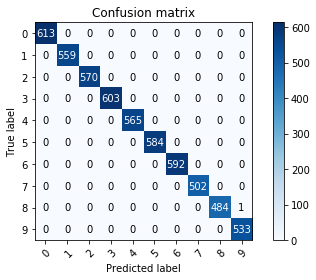

In [53]:
# Using the function provided from the example in the sklearn documentation, to plot the confusion matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix')

## Tesing on the unlabeled testing set

Since we performed the grid search without the parameter **probability = True**, we cannot perform **svm.predict_proba()**. So here we simply re-train a new SVC with the known best parameters and the probaility parameter set to True. Then we verify that out accuracy does not change.

### You can skip this section (no need to run), since the new model has been trained and stored in a file.
##### Skip to "Reading new model from file" section

In [32]:
svm2 = SVC(C = 10, gamma = 0.0005, kernel = 'rbf', random_state = 1, verbose = 1, probability = True)

In [15]:
accuracy_list2 = cross_val_score(svm2, X_normalized_pca, y, cv=10, scoring='accuracy')

print(accuracy_list2)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.99732977 0.99421193 0.99821747 0.9973262  0.99777184 0.99331253
 0.99955377 0.9968736  0.99642698 0.99776486]


In [16]:
# use average of accuracy values as final result
accuracy_cv2 = accuracy_list.mean()

print(accuracy_cv2)

0.9968788956151835


In [21]:
# Fitting the model
svm2.fit(X_normalized_pca, y)

[LibSVM]

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=1)

##### Saving our new model with the probability paramter set to True

In [22]:
svc_with_proba = svm2
filename = 'final-svm-with-proba.jbl'
joblib.dump(svc_with_proba, filename)

['final-svm-with-proba.jbl']

### Reading new model from file

In [65]:
svc_proba = joblib.load('final-svm-with-proba.jbl')

### Dimensionality Reduction on the testing set

In [66]:
cols = [x for x in range(3072)]
X_test = test_df[cols]
X_test_normalized = scale(X_test)
print(X_test_normalized)

[[-0.07 -0.16 -0.27 ... -0.24 -0.64 -0.35]
 [ 0.28 -0.78 -0.97 ... -0.34 -0.46 -0.5 ]
 [-0.48 -0.51 -0.53 ... -0.66 -0.29 -0.52]
 ...
 [-0.78 -0.8  -0.82 ... -0.82 -0.78 -0.81]
 [-0.42 -0.45 -0.48 ... -0.82 -0.34  0.57]
 [-0.38 -0.44 -0.51 ... -0.77 -0.75  1.46]]


In [67]:
X_test_normalized_pca = pca.fit_transform(X_test_normalized)
print('Done.')

Done.


In [68]:
predict_probas = svc_proba.predict_proba(X_test_normalized_pca)
print(predict_probas.shape)

(79726, 10)


In [69]:
print(predict_probas)

[[0.   0.01 0.05 ... 0.6  0.24 0.02]
 [0.2  0.02 0.05 ... 0.04 0.1  0.02]
 [0.01 0.01 0.01 ... 0.52 0.23 0.19]
 ...
 [0.06 0.15 0.04 ... 0.05 0.17 0.04]
 [0.03 0.09 0.16 ... 0.03 0.08 0.11]
 [0.02 0.17 0.06 ... 0.01 0.31 0.05]]


In [70]:
predictions_df = pd.DataFrame(predict_probas)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.004832,0.009651,0.048980,0.000566,0.004966,0.043200,0.023145,0.603947,0.239645,0.021068
1,0.203369,0.024854,0.050168,0.162690,0.253571,0.132132,0.010750,0.042897,0.103280,0.016288
2,0.009996,0.009917,0.009341,0.008133,0.001982,0.019376,0.004508,0.516945,0.234269,0.185533
3,0.040498,0.006049,0.137104,0.004829,0.017541,0.001781,0.109487,0.200352,0.479777,0.002581
4,0.009734,0.021068,0.009663,0.715313,0.096620,0.004230,0.003716,0.022371,0.088593,0.028692


##### Writing a function to prepare a dataframe into submission-valid format

In [71]:
def create_submission_df(predictions):
    submission_df = pd.DataFrame()
    cols = ['img']
    cols += [f'c{i}' for i in range(10)]
    for col in cols:
        submission_df[col] = 0
    submission_df['img'] = test_df['img']
    for i in range(10):
        submission_df[f'c{i}'] = predictions[i]
    return submission_df

In [74]:
submission_df = create_submission_df(predictions_df)
submission_df.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.004832,0.009651,0.048980,0.000566,0.004966,0.043200,0.023145,0.603947,0.239645,0.021068
1,img_10.jpg,0.203369,0.024854,0.050168,0.162690,0.253571,0.132132,0.010750,0.042897,0.103280,0.016288
2,img_100.jpg,0.009996,0.009917,0.009341,0.008133,0.001982,0.019376,0.004508,0.516945,0.234269,0.185533
3,img_1000.jpg,0.040498,0.006049,0.137104,0.004829,0.017541,0.001781,0.109487,0.200352,0.479777,0.002581
4,img_100000.jpg,0.009734,0.021068,0.009663,0.715313,0.096620,0.004230,0.003716,0.022371,0.088593,0.028692


#### Exporting the submission csv file

In [75]:
submission_df.to_csv('submission-02.csv', index = False)